# Scikit-Learn中的学习曲线

Scikit-Learn提供了一个方便的工具来计算模型的学习曲线；下面我们计算我们原始数据集在二阶多项式模型和九阶多项式模型上的学习曲线：

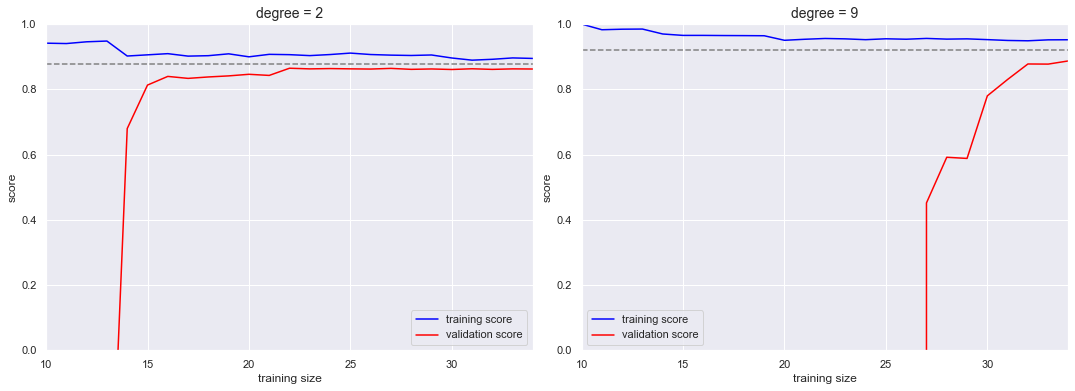

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

#管道所需的模块
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

def make_data(N, err=1.0, rseed=1):
    # 随机数据取样生成
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)



fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

这是一项非常有价值的分析，因为它为我们提供了模型随着训练数据增加发生性能变化的可视化展示。而且当你的学习曲线已经收敛时（例如当训练和验证曲线已经非常接近的情况下）*增加更多的训练数据不会显著的提升拟合度*。这个结论很容易从左图二阶模型的学习曲线中获得。

要提升已经收敛的学习曲线的性能唯一方法就是使用一个不同的（通常更复杂的）模型。我们可以从右图中看到：当使用了复杂的多的模型后，我们将收敛的分数值（使用虚线表示）提升了，付出的代价是更高的模型方差（图中训练曲线和验证曲线的间距）。如果我们继续增加更多的样本，更复杂模型的学习曲线最终也会收敛。

>绘制模型和数据集的学习曲线有助于作出进一步改善性能的决定。